### 构建全新变量及宽表 及 外部数据提取 3万样本 

### 预备流程

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
#载入宽表 次宽表由Harry整理
df = pd.read_pickle('df_aggregated.pkl')

In [4]:
# 检查表维度 并去除重复ucusid
print(df[['vcusmobile','ucusid']].nunique())

df.drop_duplicates(subset = 'ucusid', keep = 'first', inplace = True)

df[['vcusmobile','ucusid']].nunique()

vcusmobile    177561
ucusid        177529
dtype: int64

#### 保留更新后的宽表

In [12]:
df.to_pickle('df_aggregated.pkl')

### 合并宽表 与客流表与机会跟进表

#### 读取客流表与机会跟进表并与宽表合并

In [7]:
# 读取客流表 
df_cf = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/3-客流表-v3/customer_flow_total.csv', index_col=0, low_memory=False, encoding = "utf_8_sig").reset_index(drop=True)
# 读取机会跟进表
oppo_fol = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/6-机会跟进表/oppo_fol_ttl.csv', low_memory = False, encoding='utf_8_sig', index_col=0)


C:\Users\lenovo\AppData\Roaming\Python\Python37\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
# 准备用以连表的dataframe df_merge 只是用宽表的手机号与正负样本标识
df_merge = df[['vcusmobile', 'category']]

# 输出只含有宽表种正负样本的手机号
sample_mobile = list(set(df['vcusmobile']))

In [9]:
# 输出dataframe df_cf_sample 为只含正负样本数据的客流表

df_cf_sample = df_cf.loc[df_cf['vcusmobile'].isin(sample_mobile)]

In [31]:
# 合并df_merge 与 df_cf_sample, 并挑选连接机会跟进表的字段并从上到下排序

merge_1_sample_cf = pd.merge(df_merge, df_cf_sample, on = 'vcusmobile', how = 'left')

merge_1_sample_cf = merge_1_sample_cf[['vcusmobile','category','uid']]

merge_1_sample_cf = merge_1_sample_cf.sort_values(by=['vcusmobile','uid'], ascending = [True, True])

In [41]:
merge_1_sample_cf

,vcusmobile,category,uid
1,00001b6d6c161c782e7279412554aca1,0.0,0e56fdf4-04a1-4527-901d-7fc935948bb5
0,00001b6d6c161c782e7279412554aca1,0.0,1b7d7420-86e5-4104-8567-c4f211f0c2f4
2,00006ce1e6d98d745e5074f6e38eb0f4,1.0,df343cbc-4992-4763-81f7-4cba05afd8c5
3,0000945858bcf28378eddac3006fa573,1.0,8deb8cc9-4af1-4536-90cf-df2dea87b8dd
4,0000c0cfb42f98ca09903743c3863af2,0.0,8aabc661-5152-4c80-ad68-74004b50af30
...,...,...,...
215884,fffeb108d8b22010b5b7dcc426636e81,0.0,18276474-aa94-419a-ba07-0e7808e0c339
215885,fffef9d5efd26dad9fbb59b8270b570d,0.0,7cfa4952-3802-4326-b024-4cd04432beda
215886,ffff21b2f0889c68bfc88389cb12efd7,1.0,7178ad25-bb23-4769-b922-6bcdad5c8f14
215887,ffff7d03e9b1431c1df4b25ea9b57ab4,0.0,92864f9a-a05b-4997-905b-d5c6c203b5be


### 合并机会表

In [12]:
# 读取机会表
df_oppo_ttl = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/5-机会表 - v3/oppo_combined.csv', index_col=0,low_memory = False, encoding = "utf_8_sig")
df_oppo_ttl.head()

,psg_uid,uid,ucusid,jdealer,nbid,vseries,vmodel,voutcolor,vincolor,vmaterial,voriginvw,vorigin,dprebuy,vintentionlvl,vflow,fsaleprice,vmemo,vbuytype,vviemodel,vviemode2,vexperience,vcaruse,vcarusetext,vcarbudget,vplatetype,...,record_version,vguanzhu,vguanzhutext,vdissenttext,nloan,ninsure,bgoodsatta,bislookvie,bistryvie,dbegin,dend,kf_potentialcuscount,kf_zrpotentialcuscount,kf_yypotentialcuscount,kf_cjpotentialcuscount,kf_cjzrpotentialcuscount,kf_cjyypotentialcuscount,kf_testdrivecount,kf_drivetime,kf_distance,kf_visitcount,kf_yhcount,kf_projectfailedcount,ods_update_time,day_no
0,c1b526e2-7314-4993-ad95-e9bbb671e737,0006c6ec-8117-4f8b-9be1-5c2afc80e80c,4a5c6630-f4a2-47df-b7d3-d22e518aabc7,SJ37015,75E37015-0000-0000-0000-000000000000,0L,0L13PY,0Q0Q,AA,0L13PY-0Q0QAA-0H37,6.0,1.0,2020-04-30 14:27:05,1.0,7.0,102800.0,贷款买 回去考虑 黄岛的首付4万,NaN,奇瑞,长城,1.0,1.0,家用,110000,NaN,...,NaN,0,NaN,NaN,False,True,False,True,False,2020-04-20 15:03:20,2020-04-20 15:33:20,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2020-07-03 00:20:14.423,0.0
1,448f5748-eeed-4b96-aab0-20fd14bd2847,006184fb-0f6a-4dce-9e04-786c16c3fbf0,2f60d278-8144-43b4-b87b-be25d84899a0,SJ44004,75E44004-0000-0000-0000-000000000000,0L,0L13PY,0Q0Q,AA,0L13PY-0Q0QAA-0H37,6.0,1.0,2020-04-24 15:44:02,4.0,7.0,102800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,False,2020-04-19 16:39:23,2020-04-19 17:09:23,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2020-07-03 00:08:15.42,0.0
2,09eb86c2-5aae-4247-8072-666156fe45d9,00846963-af5d-4484-a183-1be9f0c922ef,bee310e1-a8c9-4f4c-9e4d-760e600eb4a8,SJ32001,75E32001-0000-0000-0000-000000000000,0L,0L14PY,NaN,NaN,NaN,6.0,1.0,2020-04-14 10:08:12,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,False,2020-04-12 10:56:07,2020-04-12 11:26:07,1.0,1.0,0.0,0.0,0.0,0.0,1.0,19.0,8.0,1.0,1.0,1.0,2020-07-03 00:15:22.519,0.0
3,de2322ea-d509-4106-8a93-abcd0d92d848,0116095c-6ae0-489d-b9cb-e87ba9a35ddc,231d7c25-9fd3-4e58-a5c6-40313cbd06aa,SJ13013,75E13013-0000-0000-0000-000000000000,0M,NaN,NaN,NaN,NaN,6.0,1.0,2020-04-03 12:00:00,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,False,2020-04-01 15:07:14,2020-04-01 15:22:14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2020-07-03 00:25:29.437,0.0
4,e7741b44-5f15-4bcf-9e5a-371407b188be,02979a8a-dab1-4a0d-8c4f-80b4cfc822e0,836249a0-a07a-4abb-8121-61119bb75632,SJ41004,75883500-0000-0000-0000-000000000000,L0,NaN,NaN,NaN,NaN,6.0,1.0,2020-05-18 00:00:00,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,False,2020-04-05 17:28:56,2020-04-05 17:58:56,1.0,1.0,0.0,1.0,1.0,0.0,1.0,25.0,5.0,1.0,1.0,0.0,2020-07-03 00:08:15.42,0.0


In [62]:
# 合并表, 获取机会表中所需字段
merge_1_sample_cf_oppo = pd.merge(merge_1_sample_cf, df_oppo_ttl, left_on = 'uid', right_on = 'psg_uid', how = 'left')

merge_1_sample_cf_oppo.columns

Index(['vcusmobile', 'category', 'uid_x', 'psg_uid', 'uid_y', 'ucusid',
       'jdealer', 'nbid', 'vseries', 'vmodel', 'voutcolor', 'vincolor',
       'vmaterial', 'voriginvw', 'vorigin', 'dprebuy', 'vintentionlvl',
       'vflow', 'fsaleprice', 'vmemo', 'vbuytype', 'vviemodel', 'vviemode2',
       'vexperience', 'vcaruse', 'vcarusetext', 'vcarbudget', 'vplatetype',
       'vplatetypetext', 'dprovidecar', 'vplate', 'vengine', 'cabandon',
       'vabandonrsn', 'vabandonrsntext', 'vvin', 'vbillno', 'fallprice',
       'flastprice', 'finsureprice', 'fgoodsprice', 'brecommend', 'vrecomcus',
       'bzhbs', 'bisapp', 'vowner', 'voldowner', 'dfirstdistribute',
       'ddistribute', 'vpaytype', 'vpaytypetext', 'urelateid', 'urecomcusid',
       'vrecomcusphone', 'vnumshop', 'createby', 'createon', 'updateby',
       'updateon', 'record_version', 'vguanzhu', 'vguanzhutext',
       'vdissenttext', 'nloan', 'ninsure', 'bgoodsatta', 'bislookvie',
       'bistryvie', 'dbegin', 'dend', 'kf_potentia

In [63]:
# 获取连表字段并去空值
merge_1_sample_cf_oppo = merge_1_sample_cf_oppo[['vcusmobile', 'category','psg_uid','ucusid']]

merge_1_sample_cf_oppo.dropna(inplace = True)

In [32]:
merge_1_sample_cf_oppo.nunique()

vcusmobile    177529
psg_uid       194302
ucusid        194288
dtype: int64

In [39]:
# 连接机会跟进表
merge_1_sample_cf_oppo_fol = pd.merge(merge_1_sample_cf_oppo, oppo_fol, on ='ucusid', how = 'left')


In [112]:
# 获取3万外部数据手机号
for_sample_1 = merge_1_sample_cf_oppo_fol[['vcusmobile','category','drealexec']]

pd.to_datetime(for_sample_1.loc[:,'drealexec'])

for_sample_1 = for_sample_1.sort_values(by=['vcusmobile', 'drealexec'], ascending = [True, False])

for_sample_1.drop_duplicates(subset = 'vcusmobile', keep = 'first', inplace = True)

for_sample_2 = for_sample_1[for_sample_1['drealexec'] > '2020-05-07 00:00:00']

for_sample_2_pos = for_sample_2[for_sample_2['category'] == 1]

for_sample_2_neg = for_sample_2[for_sample_2['category'] == 0]

pos = for_sample_2_pos.sample(n=10000, replace = False).reset_index(drop=True)

neg = for_sample_2_neg.sample(n=20000, replace = False).reset_index(drop=True)

sample_for_external = pd.concat([pos,neg])

sample_for_external.to_csv('sample_for_external.csv')

### 修改全量宽表并增加新模型变量


In [443]:
kb = pd.read_excel('机会战败概率打分宽表及下发字段.xlsx')

In [7]:
kb = pd.read_excel('机会战败概率打分宽表及下发字段.xlsx')
df = pd.read_pickle('df_aggregated.pkl')

In [8]:
kb.drop(['Unnamed: 0'], axis=1, inplace = True)
kb

,vcusmobile,ucusid,stayTime,bislookvie,bistryvie,vintentionlvl,category,count,test_count,ttl_test,...,probability,jdealer,createon,vabandonrsn,drealexec,vseries,vmodel,multiplier,time-adjusted_prob,gap
0,d639f7df1f51b90e64540c5f8df8ef21,e046b4a3-7611-4678-ac02-725a94311031,3840,1,1,1,0,1,1,1,...,0.988228,SJ37007,2019-11-09 09:34:00,2,2020-03-08 08:22:00,0L,0L13PY,NaN,NaN,266
1,ae5ddcf717f9dc45e2e247f836307e94,73acde3c-fb8d-4fe9-88d9-afb8ef8ad8dd,1800,0,0,1,0,1,0,0,...,0.987033,SJ53005,2020-06-04 10:51:00,3,2020-06-11 13:54:00,0L,0L13PY,0.016931,0.016711,57
2,c9b29cb7e09ea2f2fe864f8eee3a671c,fa973547-8f5b-42a3-a0c3-9d60fe3c34b1,28800,0,0,1,0,16,0,0,...,0.983594,SJ53010,2019-11-28 11:59:00,3,unknown,0M,0M22EV,NaN,NaN,246
3,c9b29cb7e09ea2f2fe864f8eee3a671c,fa973547-8f5b-42a3-a0c3-9d60fe3c34b1,28800,0,0,1,0,16,0,0,...,0.983594,SJ53010,2019-11-28 11:59:00,3,unknown,0M,0M22EV,NaN,NaN,246
4,c9b29cb7e09ea2f2fe864f8eee3a671c,fa973547-8f5b-42a3-a0c3-9d60fe3c34b1,28800,0,0,1,0,16,0,0,...,0.983594,SJ53010,2019-11-28 11:59:00,3,unknown,0M,0M22EV,NaN,NaN,246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107820,29d09b27e8bc468769f7f4d80c827880,3394ab26-73b7-433d-8d6f-7f4f44aadbe2,1800,0,0,4,0,1,3,11,...,0.000010,SJ32005,2019-11-17 09:43:00,unknown,2020-04-13 13:07:00,0L,0L14PY,NaN,NaN,257
107821,e50a3b6a345d4739c077354f38bf3cad,1da0165e-cc30-4753-81d6-936d53addbb3,1800,0,0,4,0,1,3,17,...,0.000009,SJ32005,2019-11-08 18:15:00,4,2020-03-21 18:41:00,0L,0L13PY,NaN,NaN,266
107822,84eb8ec082c1a81d5a7e1a14eca4093d,1548ebd8-ea76-4811-8afe-592110b4d817,1800,0,0,2,0,1,5,19,...,0.000008,SJ32005,2019-11-21 14:52:00,3,2020-01-17 15:47:00,0L,0L13PY,NaN,NaN,253
107823,426ac7216e38e055534b02949a3b3f25,1153b962-8abe-4f38-b50d-6ff9d1d0693e,1800,0,0,4,0,1,6,6,...,0.000008,SJ21002,unknown,3,2020-04-05 09:30:00,0L,0L13PY,NaN,NaN,228


In [13]:
# 使用之前所用到的 只含正负样本的客流表并与机会表左连接 
merge_1_sample_cf_oppo = pd.merge(merge_1_sample_cf, df_oppo_ttl, left_on = 'uid', right_on = 'psg_uid', how = 'left')


In [ ]:
# 获取最晚执行时间的经销商用以下发并去重
merge_1_sample_cf_oppo_fol = pd.merge(merge_1_sample_cf_oppo, oppo_fol, on ='ucusid', how = 'left')

for_sample_1 = merge_1_sample_cf_oppo_fol[['vcusmobile','drealexec','jdealer']]
pd.to_datetime(for_sample_1.loc[:,'drealexec'])

for_sample_1 = for_sample_1.sort_values(by=['vcusmobile', 'drealexec'], ascending = [True, False])

for_sample_1.drop_duplicates(subset = 'vcusmobile', keep = 'first', inplace = True)

#### 新增试驾/试驾试乘率，即顾客总到店次数中试驾/试乘试驾比例

In [ ]:
df['test_testdrive_rate'] = df['bistryvie'] / df_agg['count']
df['test_testdrive_rate'].unique()

#### 下发字段 - 增加机会跟进表字段最晚执行时间 'drealexec'及 下发经销商'jdealer_for_xiafa'

In [50]:
# 合并表为df_1 并重命名表头
df_1 = pd.merge(df, for_sample_1, left_on = 'vcusmobile', right_on = 'vcusmobile')

df_1.columns = ['vcusmobile', 'ucusid', 'cartype', 'vexperience', 'vplatetype',
       'vabandonrsn', 'stayTime', 'bislookvie', 'bistryvie', 'vintentionlvl',
       'category', 'count', 'Guanzhu0', 'Guanzhu1', 'Guanzhu2', 'Guanzhu3',
       'Guanzhu4', 'Guanzhu5', 'Guanzhu6', 'Guanzhu7', 'Guanzhu8', 'Guanzhu9',
       'is_test', 'test_count', 'ttl_test', 'cleaned_time_ttl_test',
       'cleaned_distance_ttl_test', 'is_test_drive', 'testdrive_count',
       'ttl_testdrive', 'cleaned_time_ttl_testdrive',
       'cleaned_distance_ttl_testdrive', 'vtrycarpath_test_TryDriveRoute1',
       'vtrycarpath_test_TryDriveRoute2', 'vtrycarpath_test_TryDriveRoute3',
       'vtrycarpath_testdrive_TryDriveRoute1',
       'vtrycarpath_testdrive_TryDriveRoute2',
       'vtrycarpath_testdrive_TryDriveRoute3', 'b_recommend',
       'test_testdrive_rate', 'drealexec','jdealer_for_xiafa']

####  增加上午下午 火 工作日与双休日到店次数

In [ ]:
# 摘取客流表中顾客到店时间
df_cf_sample_arrival = df_cf_sample[['vcusmobile','dbegin']]

df_cf_sample_arrival.loc[:,'dbegin'] = pd.to_datetime(df_cf_sample_arrival['dbegin'], errors='coerce').to_frame()

df_cf_sample_arrival

In [ ]:
# 将顾客到店时间换算成 周几与上下午时间
df_cf_sample_arrival['weekday'] = df_cf_sample_arrival['dbegin'].dt.dayofweek

df_cf_sample_arrival['morning'] = df_cf_sample_arrival['dbegin'].dt.hour

In [ ]:
# 看其分布并将空值设定为0
print(df_cf_sample_arrival['morning'].unique())

df_cf_sample_arrival['morning'] = df_cf_sample_arrival.fillna(0)

df_cf_sample_arrival['weekday'].unique()

In [ ]:
# 分别为顾客分类其到店时间按 indicator 为周六周日 indicator_1为早晨与夜晚
df_cf_sample_arrival['indicator'] = [1 if row == 5.0 or row == 6.0 else 0 for row in df_cf_sample_arrival.loc[:,'weekday']]

list_hour = [0,1,2,3,4,5,6,7,8,9,10,11,12]

df_cf_sample_arrival['indicator_1'] = [1 if row in  list_hour else 0 for row in df_cf_sample_arrival.loc[:,'morning']]

In [ ]:
# 为每位用户计算其 周末到店次数 与 早上到店次数
c = df_cf_sample_arrival.groupby(['vcusmobile'])['indicator','indicator_1'].sum().reset_index()

df_2 = pd.merge(df_1, c, left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

df_2.columns = ['vcusmobile', 'ucusid', 'cartype', 'vexperience', 'vplatetype',
       'vabandonrsn', 'stayTime', 'bislookvie', 'bistryvie', 'vintentionlvl',
       'category', 'count', 'Guanzhu0', 'Guanzhu1', 'Guanzhu2', 'Guanzhu3',
       'Guanzhu4', 'Guanzhu5', 'Guanzhu6', 'Guanzhu7', 'Guanzhu8', 'Guanzhu9',
       'is_test', 'test_count', 'ttl_test', 'cleaned_time_ttl_test',
       'cleaned_distance_ttl_test', 'is_test_drive', 'testdrive_count',
       'ttl_testdrive', 'cleaned_time_ttl_testdrive',
       'cleaned_distance_ttl_testdrive', 'vtrycarpath_test_TryDriveRoute1',
       'vtrycarpath_test_TryDriveRoute2', 'vtrycarpath_test_TryDriveRoute3',
       'vtrycarpath_testdrive_TryDriveRoute1',
       'vtrycarpath_testdrive_TryDriveRoute2',
       'vtrycarpath_testdrive_TryDriveRoute3', 'b_recommend',
       'test_testdrive_rate', 'drealexec', 'jdealer_for_xiafa', 'weekend_tag',
       'morning_tag']

#### 增加到店最多的经销商大区/小区


In [13]:
# 选取相应字段
df_cf_sample_jdealer = df_cf_sample[['vcusmobile','jdealer']]
df_cf_sample_jdealer

,vcusmobile,jdealer
0,6a61f447e810a4e7ac810303a2fa0c73,SJ64001
1,79dccca7b81c02eb3f9a05fa678d532f,SJ37020
2,537d05e39d726bd55f33145f1cb63d93,SJ44006
4,dae8ef818361314806d6411522f79132,SJ12001
5,5b81375f9b66072118fb134f82f24909,SJ53001
...,...,...
452143,9576b787a2719cf61d5f62a79e43fd4f,SJ51001
452144,e342c2bd8412b02792286c8fac0727f9,SJ51001
452146,658c8f8b31dbcaa579775908f185634a,SJ51001
452148,a13af8d99475bf3993e561762c194aad,SJ51001


In [14]:
# 获取经销商次数
jdealer_number = df_cf_sample_jdealer.drop_duplicates(subset=['vcusmobile','jdealer'], keep = 'first')

jdealer_number = jdealer_number.groupby(['vcusmobile'])['jdealer'].count().reset_index()

In [27]:
# 获取去得最多得经销商
jdealer_counts = df_cf_sample_jdealer.groupby(['vcusmobile']).agg(
    { 'jdealer' : lambda x:x.value_counts().index[0]
    }
).reset_index()

jdealer_counts

,vcusmobile,jdealer
0,00001b6d6c161c782e7279412554aca1,SJ13006
1,00006ce1e6d98d745e5074f6e38eb0f4,SJ32001
2,0000945858bcf28378eddac3006fa573,SJ65001
3,0000c0cfb42f98ca09903743c3863af2,SJ36002
4,0000e4d62a27572d110046e45fe14583,SJ13006
...,...,...
177524,fffeb108d8b22010b5b7dcc426636e81,SJ37019
177525,fffef9d5efd26dad9fbb59b8270b570d,SJ44001
177526,ffff21b2f0889c68bfc88389cb12efd7,SJ53004
177527,ffff7d03e9b1431c1df4b25ea9b57ab4,SJ14001


In [18]:
# 读取经销商对应区域文件 并 合并 去重 更改字段名称
section = pd.read_excel('附件1：经销商对应区域清单（md5).xlsx')

jdealer_seciont = pd.merge(jdealer_counts, section, left_on='jdealer', right_on = '销售代码', how='left')

df_7.drop_duplicates(subset=['vcusmobile'],keep='first', inplace=True)

jdealer_seciont = jdealer_seciont[['vcusmobile','销售大区','销售小区']]
jdealer_seciont.columns = ['vcusmobile','Section_Macro','Section_Micro']

In [176]:
# 合并获取到店次数，与最多到点经销商 并进行规范化字段值
df_3 = pd.merge(df_2, jdealer_number, left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

df_3 = pd.merge(df_3, jdealer_seciont, left_on='vcusmobile', right_on = 'vcusmobile', how = 'left')

df_3['Section_Micro']  = [row[:3] for row in df_3.loc[:,'Section_Micro']]

df_3['Section_Macro'] = [row[:3] for row in df_3.loc[:,'Section_Macro']]

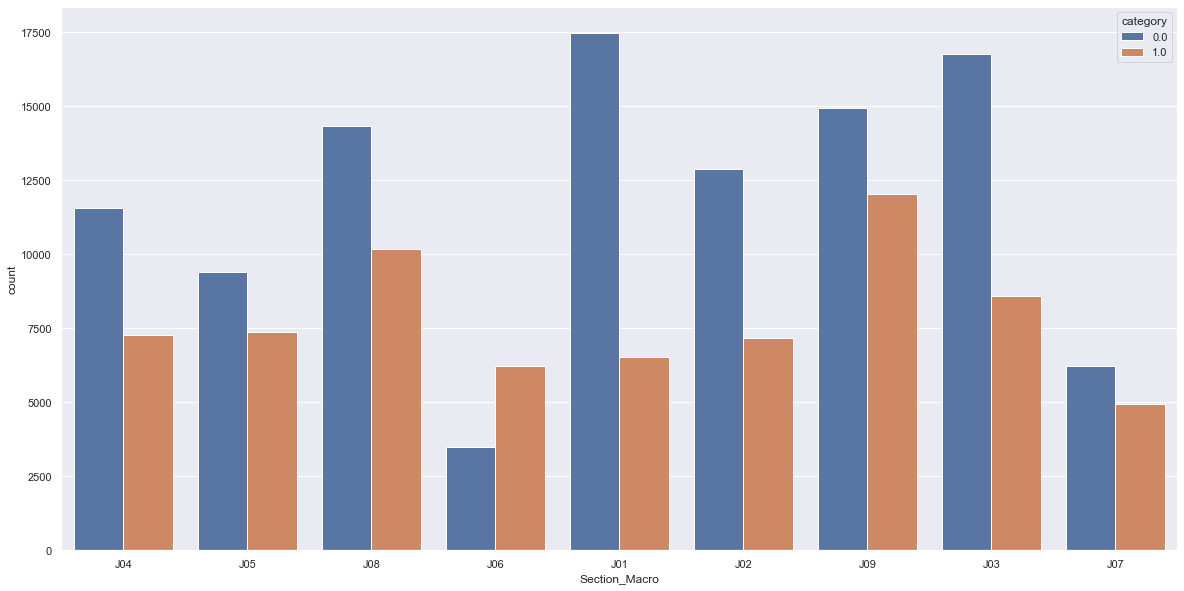

In [487]:
plt.figure(figsize=(20,10))
ax_2 = sns.countplot(x="Section_Macro", hue="category", data=df_3)


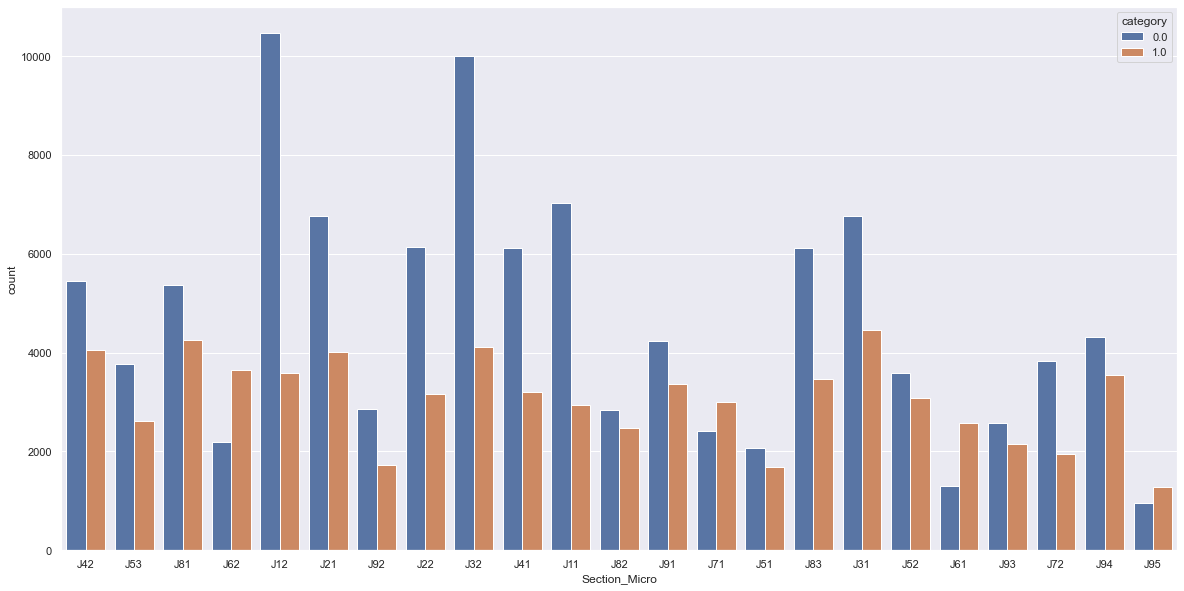

In [113]:
plt.figure(figsize=(20,10))
ax_1 = sns.countplot(x="Section_Micro", hue="category", data=a)

#### 增加单次到店人数

In [203]:
# 选取相应字段
df_cf_sample_peer = df_cf_sample[['vcusmobile','vpeernum']]

b.vpeernum = b.vpeernum.fillna(1)

In [218]:
# 观察到店人数分布
b = df_cf_sample_peer.groupby(['vcusmobile'])['vpeernum'].max().reset_index()

In [222]:
# 算出平均到店人数为1.5人/次
(1*121495 + 2 * 33261 + 3 * 14666 + 4 * 6007 + 5 * 1607 + 6 * 344 + 7 *97 + 8 * 24 + 9 * 9 + 10 * 10) / (121495 + 33261 + 14666 + 6007 +  1607 + 344 + 97 +  24 +  9 +  100)

1.5043860143009966

In [223]:
# 将异常到店人数更改为平均值（四舍五入）
b.vpeernum = [2 if row > 10 else row for row in b.vpeernum]

In [227]:
# 合并
df_4 = pd.merge(df_3, b, left_on = 'vcusmobile', right_on='vcusmobile', how='left')
df_4.head()

,vcusmobile,ucusid,cartype,vexperience,vplatetype,vabandonrsn,stayTime,bislookvie,bistryvie,vintentionlvl,...,vtrycarpath_testdrive_TryDriveRoute2,vtrycarpath_testdrive_TryDriveRoute3,b_recommend,test_testdrive_rate,jdealer_for_xiafa,drealexec,weekend_tag,morning_tag,jdealer_count,vpeernum
0,00001b6d6c161c782e7279412554aca1,de98515e-70f7-4809-90f4-79b8b2b64bb7,0.0,0.0,0.0,3.0,393.0,0.0,0.0,1.0,...,0.0,0.0,0,0.0,SJ13006,2020-05-11 09:54:45,1,2,1,1.0
1,00006ce1e6d98d745e5074f6e38eb0f4,5ac1f832-efbc-4f32-8c91-85becbafc0bd,1.0,0.0,0.0,0.0,1800.0,0.0,0.0,3.0,...,0.0,0.0,0,0.0,SJ32001,2020-05-26 10:20:01,1,1,1,1.0
2,0000945858bcf28378eddac3006fa573,715d0edf-fdb0-42f0-a58b-bcfbe70c20db,1.0,0.0,0.0,0.0,1800.0,0.0,0.0,1.0,...,0.0,0.0,0,0.0,SJ65001,2020-06-24 19:19:45,0,0,1,1.0
3,0000c0cfb42f98ca09903743c3863af2,fb1490fe-9795-4890-8fa4-6d3a1258ce6e,0.0,0.0,0.0,3.0,1800.0,0.0,0.0,3.0,...,0.0,0.0,0,0.0,SJ36002,2020-04-12 15:18:16,1,1,1,1.0
4,0000e4d62a27572d110046e45fe14583,2d10ba00-6d2c-4449-b342-b992d4fcdf95,0.0,0.0,0.0,2.0,8801.0,0.0,0.0,3.0,...,0.0,0.0,0,0.0,SJ13006,2019-12-14 17:38:48,0,0,1,1.0


#### 增加第一次/最后一次到店是否试驾

In [ ]:
# 选取相应字段
df_cf_sample_peer = df_cf_sample[['vcusmobile','dbegin']]

merge_1_sample_cf_oppo = pd.merge(merge_1_sample_cf, df_oppo_ttl, left_on = 'uid', right_on = 'psg_uid', how = 'left')

merge_1_sample_cf_oppo.columns

In [334]:
d = merge_1_sample_cf_oppo[['vcusmobile','dbegin','bistryvie']]

In [342]:
# 更改字段为事件类型字段
d[['dbegin']] = pd.to_datetime(d['dbegin'])

# 并从早到晚排序
d = d.sort_values(by=['vcusmobile','dbegin'], ascending = [True, True])

# 去重
d = d.drop_duplicates(subset = ['vcusmobile'],keep='first')

# 补空值
d = d.fillna(0).reset_index(drop=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [349]:
# 因为机会表为顾客第一次到点意愿，因此 1为第一次到点试驾 0 为无
d.bistryvie = [1 if row == True else 0 for row in d.loc[:,'bistryvie']]

d.bistryvie

0         0
1         0
2         0
3         0
4         0
         ..
177524    1
177525    0
177526    0
177527    0
177528    0
Name: bistryvie, Length: 177529, dtype: int64

In [350]:
df_5 = pd.merge(df_4, d[['vcusmobile','bistryvie']], left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

In [351]:
df_5.head()

,vcusmobile,ucusid,cartype,vexperience,vplatetype,vabandonrsn,stayTime,bislookvie,bistryvie_x,vintentionlvl,...,vtrycarpath_testdrive_TryDriveRoute3,b_recommend,test_testdrive_rate,jdealer_for_xiafa,drealexec,weekend_tag,morning_tag,jdealer_count,vpeernum,bistryvie_y
0,00001b6d6c161c782e7279412554aca1,de98515e-70f7-4809-90f4-79b8b2b64bb7,0.0,0.0,0.0,3.0,393.0,0.0,0.0,1.0,...,0.0,0,0.0,SJ13006,2020-05-11 09:54:45,1,2,1,1.0,0
1,00006ce1e6d98d745e5074f6e38eb0f4,5ac1f832-efbc-4f32-8c91-85becbafc0bd,1.0,0.0,0.0,0.0,1800.0,0.0,0.0,3.0,...,0.0,0,0.0,SJ32001,2020-05-26 10:20:01,1,1,1,1.0,0
2,0000945858bcf28378eddac3006fa573,715d0edf-fdb0-42f0-a58b-bcfbe70c20db,1.0,0.0,0.0,0.0,1800.0,0.0,0.0,1.0,...,0.0,0,0.0,SJ65001,2020-06-24 19:19:45,0,0,1,1.0,0
3,0000c0cfb42f98ca09903743c3863af2,fb1490fe-9795-4890-8fa4-6d3a1258ce6e,0.0,0.0,0.0,3.0,1800.0,0.0,0.0,3.0,...,0.0,0,0.0,SJ36002,2020-04-12 15:18:16,1,1,1,1.0,0
4,0000e4d62a27572d110046e45fe14583,2d10ba00-6d2c-4449-b342-b992d4fcdf95,0.0,0.0,0.0,2.0,8801.0,0.0,0.0,3.0,...,0.0,0,0.0,SJ13006,2019-12-14 17:38:48,0,0,1,1.0,0


In [352]:
df_5.columns = ['vcusmobile', 'ucusid', 'cartype', 'vexperience', 'vplatetype',
       'vabandonrsn', 'stayTime', 'bislookvie', 'bistryvie', 'vintentionlvl',
       'category', 'count', 'Guanzhu0', 'Guanzhu1', 'Guanzhu2', 'Guanzhu3',
       'Guanzhu4', 'Guanzhu5', 'Guanzhu6', 'Guanzhu7', 'Guanzhu8', 'Guanzhu9',
       'is_test', 'test_count', 'ttl_test', 'cleaned_time_ttl_test',
       'cleaned_distance_ttl_test', 'is_test_drive', 'testdrive_count',
       'ttl_testdrive', 'cleaned_time_ttl_testdrive',
       'cleaned_distance_ttl_testdrive', 'vtrycarpath_test_TryDriveRoute1',
       'vtrycarpath_test_TryDriveRoute2', 'vtrycarpath_test_TryDriveRoute3',
       'vtrycarpath_testdrive_TryDriveRoute1',
       'vtrycarpath_testdrive_TryDriveRoute2',
       'vtrycarpath_testdrive_TryDriveRoute3', 'b_recommend',
       'test_testdrive_rate', 'drealexec',  'jdealer_for_xiafa'， 'weekend_tag',
       'morning_tag', 'max_visited_jdealer', 'num_visitors', '1st_tryvie_tag']

#### 增加最后一次到店是否试驾

In [278]:
# 读取客流表
td = pd.read_csv('C:/Users/lenovo/Automobile/机会战败模型/4-试乘试驾表-V3/test_drive_ttl.csv', low_memory = False, index_col=0)

# 获取客流表中的正负样本以及所对应字段
td_sample = td.loc[td['vcusmobile'].isin(sample_mobile)]

td_sample_1 = td_sample[['vcusmobile','dtrybegin']]

In [357]:
# 将开始试驾时间改为时间变量 并从晚到早排序/用户
td_sample_1.loc[:,'dtrybegin'] = pd.to_datetime(td_sample_1['dtrybegin']).to_frame()

td_sample_1.sort_values(by=['vcusmobile','dtrybegin'], ascending = [True, False])

,vcusmobile,dtrybegin
95397,00006ce1e6d98d745e5074f6e38eb0f4,2020-04-11 12:00:23
93365,0000c0cfb42f98ca09903743c3863af2,2020-04-11 16:13:47
25022,00023bcaba4702aa2c3a47f22e870da5,2019-11-01 18:06:11
44452,0003d9b2a5038cebdacfedbffc3133ca,2020-01-15 15:00:23
114932,00046ab0174cb77220c0478c5641a589,2020-05-24 17:31:07
...,...,...
37571,fff9b81204ef45381da0f44a1c720c70,2020-05-01 15:30:17
42789,fffc0ab514f6c8a7ca3520ba700aea22,2020-06-12 14:00:00
42881,fffdfc04b0899eaf83653b8384ef5029,2020-05-05 17:25:22
36683,fffeb108d8b22010b5b7dcc426636e81,2020-04-11 16:40:26


In [358]:
# 去除重复值，只保留最后一次试驾时间
td_sample_1 = td_sample_1.drop_duplicates(subset='vcusmobile',keep='first')

In [359]:
#同时找到客流表中，用户最后一次到店记录，并去重
df_cf_sample_testdrive = df_cf_sample[['vcusmobile','dbegin']]

df_cf_sample_testdrive.loc[:,'dbegin'] = pd.to_datetime(df_cf_sample_testdrive['dbegin']).to_frame()

df_cf_sample_testdrive = df_cf_sample_testdrive.sort_values(by=['vcusmobile','dbegin'], ascending = [True, False])

df_cf_sample_testdrive = df_cf_sample_testdrive.drop_duplicates(subset=['vcusmobile'], keep='first')

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [362]:
# 各表合并, 如若客户在最后一次到店时间中并未试驾，则会有空值，因此判断
e = pd.merge(df_cf_sample_testdrive, td_sample_1, left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

e.loc[:,'dbegin'] = pd.to_datetime(e.dbegin).to_frame()
e.loc[:,'dtrybegin'] = pd.to_datetime(e.dtrybegin).to_frame()

In [365]:
e.head()

,vcusmobile,dbegin,dtrybegin
0,00001b6d6c161c782e7279412554aca1,2020-05-03 09:55:40,NaT
1,00006ce1e6d98d745e5074f6e38eb0f4,2020-04-11 11:48:01,2020-04-11 12:00:23
2,0000945858bcf28378eddac3006fa573,2020-06-10 13:10:17,NaT
3,0000c0cfb42f98ca09903743c3863af2,2020-04-11 11:30:11,2020-04-11 16:13:47
4,0000e4d62a27572d110046e45fe14583,2019-12-13 14:45:19,NaT


In [395]:
# 以防万一，将变量全部重新调整为时间变量
e['dbegin_date'] = e.dbegin.dt.date

e['dtrybegin_date'] = e.dtrybegin.dt.date

e['dtrybegin_date'] = pd.to_datetime(e['dtrybegin_date'])
e['dbegin_date'] = pd.to_datetime(e['dbegin_date'])

e['dtrybegin_date'] = e['dtrybegin_date'].fillna('1970-0-01')

In [390]:
e.index

Index(['vcusmobile', 'dbegin', 'dtrybegin', 'dbegin_date', 'dtrybegin_date'], dtype='object')

In [388]:
# 进行时间之间的对比
def date_comparison(a, b):
    if a > b:
        return 1
    else:
        return 0
    
e['indicator'] = e.apply(lambda row:date_comparison(row['dbegin_date'],row['dtrybegin_date']), axis = 1)

In [402]:
df_6 = pd.merge(df_5, e[['vcusmobile','indicator']], left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

# df_6.drop(['drealexec'], axis=1,inplace=True)

#### 增加平均每次试驾与试乘试驾时间

In [423]:
df_6['avg_test'] = df_6['cleaned_time_ttl_test'] / df['ttl_test']
df_6['avg_testdrive'] = df_6['cleaned_time_ttl_testdrive'] / df['ttl_testdrive']

In [425]:
df_6[['cleaned_time_ttl_testdrive']]

,cleaned_time_ttl_testdrive
0,0.00
1,20.03
2,0.00
3,6.22
4,0.00
...,...
177524,0.23
177525,0.00
177526,0.00
177527,0.00


#### 下发字段 - 意向车系/型

In [444]:
# 选取相应表
merge_1_sample_cf_oppo_fol = pd.merge(merge_1_sample_cf_oppo, oppo_fol, on ='ucusid', how = 'left')

Index(['Unnamed: 0', 'vcusmobile', 'ucusid', 'stayTime', 'bislookvie',
       'bistryvie', 'vintentionlvl', 'category', 'count', 'test_count',
       'ttl_test', 'cleaned_time_ttl_test', 'cleaned_distance_ttl_test',
       'testdrive_count', 'ttl_testdrive', 'cleaned_time_ttl_testdrive',
       'cartype_1.0', 'cartype_2.0', 'cartype_3.0', 'vexperience_1.0',
       'vexperience_2.0', 'vexperience_3.0', 'vplatetype_1.0',
       'vplatetype_2.0', 'vplatetype_3.0', 'vplatetype_4.0', 'brecommend_True',
       'Guanzhu0_1', 'Guanzhu1_1', 'Guanzhu2_1', 'Guanzhu3_1', 'Guanzhu4_1',
       'Guanzhu5_1', 'Guanzhu6_1', 'Guanzhu7_1', 'Guanzhu8_1', 'is_test_1.0',
       'is_test_drive_2.0', 'probability', 'jdealer', 'createon',
       'vabandonrsn', 'drealexec', 'vseries', 'vmodel', 'multiplier',
       'time-adjusted_prob', 'gap'],
      dtype='object')

In [ ]:
# 截取最进一次执行时间的意向车系

for_sample_2 = merge_1_sample_cf_oppo_fol[['vcusmobile','vseries','vmodel'，'drealexec']]

pd.to_datetime(for_sample_1.loc[:,'drealexec'])

for_sample_2 = for_sample_1.sort_values(by=['vcusmobile', 'drealexec'], ascending = [True, False])

for_sample_2.drop_duplicates(subset = 'vcusmobile', keep = 'first', inplace = True)

In [ ]:
# 修正所有 -1 以及 nan的意向车系
a = ['0L', '0M', 'L0']
for_sample_2['vseries'] = ['unknown' if row == 'unknown' or row == -1 else row for row in for_sample_2.vseries]

b = ['0L12PV','0L12PY','0L13PV','0L13PY','0L14PY','0L22PV','0L22PY','0L23PV','0L23PY','0L24PY','0M22EV','0M23EV','0M23EY','0M24EV','0M24EY','L022PV','L022PY','L023PV','L023PY','L024PY'
]
for_sample_2['vmodel_y'] = [row if row in b else 'unknown' for row in for_sample_2['vmodel_y'] ]

In [454]:
for_sample_2.vseries.unique()

array(['0L', '0M', 'L0', 'unknown'], dtype=object)

In [455]:
df_7 = pd.merge(df_6, for_sample_2, left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

In [458]:
# 无发连接的null值改为'unknown'
df_7.vseries = df_7.vseries.replace(pd.NA, 'unknown')

In [465]:
df_7.columns

Index(['vcusmobile', 'ucusid', 'cartype', 'vexperience', 'vplatetype',
       'vabandonrsn', 'stayTime', 'bislookvie', 'bistryvie', 'vintentionlvl',
       'category', 'count', 'Guanzhu0', 'Guanzhu1', 'Guanzhu2', 'Guanzhu3',
       'Guanzhu4', 'Guanzhu5', 'Guanzhu6', 'Guanzhu7', 'Guanzhu8', 'Guanzhu9',
       'is_test', 'test_count', 'ttl_test', 'cleaned_time_ttl_test',
       'cleaned_distance_ttl_test', 'is_test_drive', 'testdrive_count',
       'ttl_testdrive', 'cleaned_time_ttl_testdrive',
       'cleaned_distance_ttl_testdrive', 'vtrycarpath_test_TryDriveRoute1',
       'vtrycarpath_test_TryDriveRoute2', 'vtrycarpath_test_TryDriveRoute3',
       'vtrycarpath_testdrive_TryDriveRoute1',
       'vtrycarpath_testdrive_TryDriveRoute2',
       'vtrycarpath_testdrive_TryDriveRoute3', 'b_recommend',
       'test_testdrive_rate', 'jdealer_for_xiafa', 'weekend_tag',
       'morning_tag', 'max_visited_jdealer', 'num_visitors', '1st_tryvie_tag',
       'indicator', 'avg_test', 'avg_testdrive'

#### 下发字段 - 线索创建时间

In [ ]:
merge_1_sample_cf_oppo_fol = pd.merge(merge_1_sample_cf_oppo, oppo_fol, on ='ucusid', how = 'left')

# 截取最小一次线索执行时间

for_sample_3 = merge_1_sample_cf_oppo_fol[['vcusmobile','createon_y']]

for_sample_3.loc['createon_y'] = pd.to_datetime(for_sample_3['createon_y'])

for_oppo = for_oppo.sort_values(by=['vcusmobile', 'createon_y'], ascending = [True, True])

for_sample_2.drop_duplicates(subset = 'vcusmobile', keep = 'first', inplace = True)

for_oppo.drop_duplicates(subset='vcusmobile', keep = 'first', inplace = True)

df_8 = pd.merge(df_7, for_oppo, on='vcusmobile', how = 'left')

#### 增加该顾客最长到店时间

In [48]:
df_cf_time = df_cf_sample[['vcusmobile','dbegin','dend']]

In [49]:
# 截取相应字段
df_cf_time['dbegin'] = pd.to_datetime(df_cf_time['dbegin'])

df_cf_time['dend'] = pd.to_datetime(df_cf_time['dend'])

df_cf_time['duration'] = df_cf_time['dend'] - df_cf_time['dbegin']

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
# 获取每个客户的最长到店时间
h = df_cf_time.groupby(['vcusmobile'])['duration'].max().reset_index()

In [52]:
h.head()

,vcusmobile,duration
0,00001b6d6c161c782e7279412554aca1,01:52:20
1,00006ce1e6d98d745e5074f6e38eb0f4,00:30:00
2,0000945858bcf28378eddac3006fa573,00:30:00
3,0000c0cfb42f98ca09903743c3863af2,00:30:00
4,0000e4d62a27572d110046e45fe14583,02:26:41


In [53]:
# 将该事件提取出小时与分钟并进行计算
h['duration_hours'] = h['duration'].dt.components['hours']
h['duration_minutes'] = h['duration'].dt.components['minutes']  
h['duration_in_minutes'] = h['duration_hours']  * 60 + h['duration_minutes']

In [54]:
g = h.groupby(['vcusmobile'])['duration_in_minutes'].max().reset_index()

In [545]:
g.head()

,vcusmobile,duration_in_minutes
0,00001b6d6c161c782e7279412554aca1,112
1,00006ce1e6d98d745e5074f6e38eb0f4,30
2,0000945858bcf28378eddac3006fa573,30
3,0000c0cfb42f98ca09903743c3863af2,30
4,0000e4d62a27572d110046e45fe14583,146


In [55]:
df_10 = pd.merge(df_8, g, left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left' )

In [56]:
# 计算平均看车时间并将其与总看车时间换算成分钟
df_10['avg_kanche'] = df_10['stayTime'] / df_8['count']
df_10['avg_kanche'] = df_10['avg_kanche'] / 60

df_10['stayTime'] = df_10['stayTime'] / 60

#### 增加渠道

In [59]:
import numpy as np

In [61]:
# 清理渠道数据
i = df_cf_sample[['vcusmobile','voriginvw']].fillna('unknown')

i['voriginvw'].unique()

array([6.0, 'unknown', 4.0, 3.0, 5.0, 1.0, 8.0, 7.0], dtype=object)

In [62]:
#寻找渠道的众数
k = i.groupby(['vcusmobile']).agg({'voriginvw':lambda x: x.value_counts().index[0]}).reset_index()

In [63]:
# 合并渠道
df_11 = pd.merge(df_10, k, left_on = 'vcusmobile', right_on = 'vcusmobile', how = 'left')

In [64]:
df_11.head()

,vcusmobile,ucusid,cartype,vexperience,vplatetype,vabandonrsn,stayTime,bislookvie,bistryvie,vintentionlvl,...,1st_tryvie_tag,indicator,avg_test,avg_testdrive,vseries,Section_Macro,Section_Micro,avg_kanche,duration_in_minutes,voriginvw
0,00001b6d6c161c782e7279412554aca1,de98515e-70f7-4809-90f4-79b8b2b64bb7,0.0,0.0,0.0,3.0,6.550000,0.0,0.0,1.0,...,0,0,0.0,0.00,L0,J04,J42,6.550000,112,6
1,00006ce1e6d98d745e5074f6e38eb0f4,5ac1f832-efbc-4f32-8c91-85becbafc0bd,1.0,0.0,0.0,0.0,30.000000,0.0,0.0,3.0,...,0,0,0.0,20.03,unknown,J05,J53,30.000000,30,6
2,0000945858bcf28378eddac3006fa573,715d0edf-fdb0-42f0-a58b-bcfbe70c20db,1.0,0.0,0.0,0.0,30.000000,0.0,0.0,1.0,...,0,0,0.0,0.00,unknown,J08,J81,30.000000,30,6
3,0000c0cfb42f98ca09903743c3863af2,fb1490fe-9795-4890-8fa4-6d3a1258ce6e,0.0,0.0,0.0,3.0,30.000000,0.0,0.0,3.0,...,0,0,0.0,6.22,L0,J06,J62,30.000000,30,6
4,0000e4d62a27572d110046e45fe14583,2d10ba00-6d2c-4449-b342-b992d4fcdf95,0.0,0.0,0.0,2.0,146.683333,0.0,0.0,3.0,...,0,0,0.0,0.00,0M,J04,J42,146.683333,146,6


### 增加GAP字段, 即正样本顾客中, 最后一次到店时间与订单成交时间之差

In [ ]:
# 读取订单表
order = pd.read_csv('C:/Users/lenovo/Automobile/订单/order_ttl.csv', index_col=0,low_memory = False, encoding = "utf_8_sig")

# 并解渠所需字段
order['dclose'] = pd.to_datetime(order['dclose'])
order_vcus = order[['vcusmobile', 'dclose']]

In [ ]:
df_dummy_order = pd.merge(df_11, order_vcus, on ='vcusmobile', how = 'left')

In [ ]:
cust_flow_entry = df_cf_sample[['vcusmobile','dbegin']].reset_index(drop=True).sort_values(by=['vcusmobile','dbegin'],ascending=[True,True])

verify = cust_flow_entry.copy()

In [ ]:
cust_flow_entry.drop_duplicates(subset='vcusmobile', keep='first', inplace = True)

cust_flow_entry.reset_index(drop=True, inplace = True)

In [ ]:
merge = pd.merge(df_dummy_order, cust_flow_entry, on = 'vcusmobile', how = 'left')

In [ ]:
# 此处可验证，我们的负样本无订单完成时间
merge[merge['category'] == 0.0]['dclose'].isna().sum()

In [ ]:
# 由此，我们可算出正样本的gap
merge['dclose'] = pd.to_datetime(merge['dclose'])
merge['dbegin'] = pd.to_datetime(merge['dbegin'])

merge['gap'] = round((merge['dclose'] - merge['dbegin']) / np.timedelta64(1, 'D'), 4)

In [ ]:
df_12 = merge.copy()

In [65]:
# 形成最终宽表，包括所有新增变量以及 dclose, dbegin 及 gap
df_12.to_pickle('df_final_attributes.pkl')

# 备份
#df_12.to_pickle('df_final_attributes_1.pkl')